In [1]:
# importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''
name
year
selling_price
km_driven
fuel            -> diesel/petrol/lpg/cng/electric
seller_type     -> indiviudal/dealer
transmission    -> manual/auto
Owner           -> first/second
'''
car_sale_data = pd.read_csv('./data/car_data.csv')
TRAIN_RATIO = 0.8

#### Mapping brand value


In [3]:
import re

def get_brand(name):
  """Returns the car brand from the car name."""
  pattern = r'(\w+)'
  match = re.search(pattern, name)
  if match:
    return match.group(1)
  else:
    return None
  
## Acc to 2022 Indian market share, Statista
brand_values = {
    'Maruti' : 0.46,
    'Hyundai': 0.17,
    'Tata': 0.09,
    'Mahindra': 0.05,
    'Kia': 0.06,
    'Toyota': 0.04,
    'Honda': 0.03,
    'Renault': 0.03
}
brands = {get_brand(name) for name in car_sale_data['name'].unique()}
other_brands = np.setdiff1d(brands, list(brand_values.keys()))
other_brands_value = 0.07 / len(other_brands)

def get_brand_val(name):
    brand_name = get_brand(name)
    if brand_name in brand_values:
        return brand_values[brand_name]
    else:
        return other_brands_value

car_sale_data['brand'] = car_sale_data['name'].apply(get_brand_val)
car_sale_data.drop('name', axis=1, inplace=True)
car_sale_data.isna().sum()

car_sale_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,0.46
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,0.46
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,0.17
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,0.07
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,0.03
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,0.17
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,0.17
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,0.46
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,0.17


#### Mapping owner number to integer


In [4]:
car_sale_data['owner'].value_counts()
def get_no_owners(info):
    nos = {
        'First Owner' : 1,
        'Second Owner': 2,
        'Third Owner': 3,
        'Fourth & Above Owner': 4,
        'Test Drive Car': 0
    }
    return nos[info]

car_sale_data['owner'] = car_sale_data['owner'].apply(get_no_owners)
car_sale_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,1,0.46
1,2007,135000,50000,Petrol,Individual,Manual,1,0.46
2,2012,600000,100000,Diesel,Individual,Manual,1,0.17
3,2017,250000,46000,Petrol,Individual,Manual,1,0.07
4,2014,450000,141000,Diesel,Individual,Manual,2,0.03
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,2,0.17
4336,2014,409999,80000,Diesel,Individual,Manual,2,0.17
4337,2009,110000,83000,Petrol,Individual,Manual,2,0.46
4338,2016,865000,90000,Diesel,Individual,Manual,1,0.17


#### Splitting data

In [5]:
X_df = car_sale_data.drop('selling_price', axis=1)
Y_df = car_sale_data['selling_price']

train_size = int(TRAIN_RATIO * len(car_sale_data))
X_train, Y_train = X_df[:train_size], Y_df[:train_size]
X_test, Y_test = X_df[train_size:], Y_df[train_size:]


In [6]:
X_train.isna().sum()
check_columns = ['fuel', 'transmission', 'seller_type', 'owner']
for col in check_columns:
    print(f'uniq values in {col} are {X_train[col].unique()}')

uniq values in fuel are ['Petrol' 'Diesel' 'CNG' 'LPG']
uniq values in transmission are ['Manual' 'Automatic']
uniq values in seller_type are ['Individual' 'Dealer' 'Trustmark Dealer']
uniq values in owner are [1 2 4 3 0]


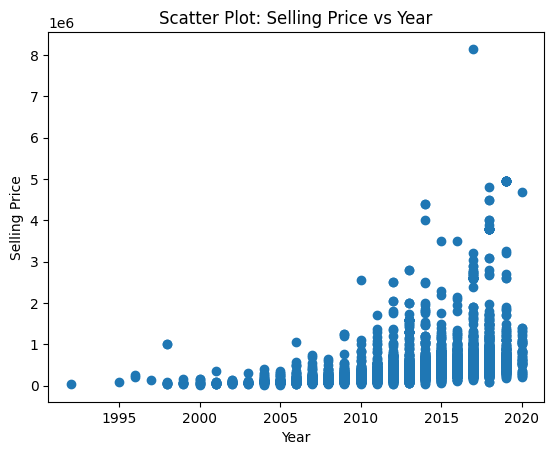

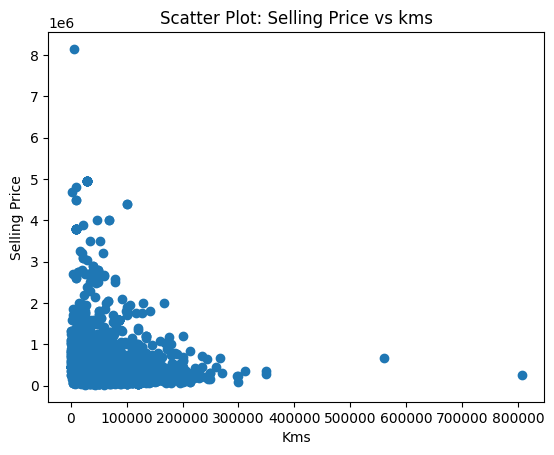

In [7]:
# checking whether year and km_driven have any linear relationship with selling price
plt.scatter(X_train['year'], Y_train)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Scatter Plot: Selling Price vs Year')
plt.show()

plt.scatter(X_train['km_driven'], Y_train)
plt.xlabel('Kms')
plt.ylabel('Selling Price')
plt.title('Scatter Plot: Selling Price vs kms')
plt.show()


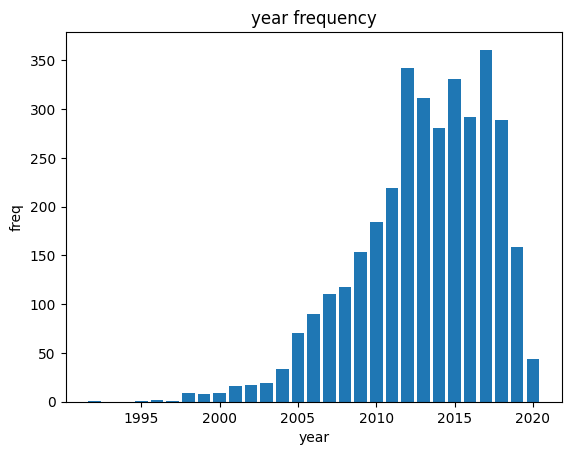

Text(0.5, 1.0, 'kms vs freq')

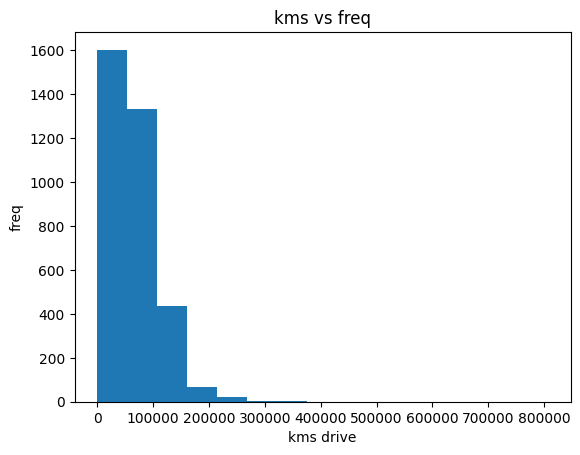

In [8]:
# visualising the distribution of various params

year_counts = X_train['year'].value_counts()
plt.bar(year_counts.index, year_counts.values)
plt.xlabel('year')
plt.ylabel('freq')
plt.title("year frequency")
plt.show()

plt.hist(X_train['km_driven'], bins=15)
plt.xlabel('kms drive')
plt.ylabel('freq')
plt.title("kms vs freq")

from the above histograms, it can be inferred that
kms_drive more than 400k are scarce
similarly, year < 1995

In [9]:
possible_outliers = X_train.loc[(X_train['km_driven'] > 350000) | (X_train['year'] <= 1996)]
print(possible_outliers)

X_train['year'].value_counts()
X_train['km_driven'].value_counts()

df_filtered = X_train.loc[(X_train['km_driven'] <= 350000) & (X_train['year'] > 1996)]
# outliers removed

      year  km_driven    fuel seller_type transmission  owner  brand
61    1996      35000  Diesel  Individual       Manual      2   0.05
525   2016     560000  Diesel      Dealer       Manual      1   0.46
631   1995     100000  Petrol  Individual       Manual      2   0.46
1243  2009     806599  Petrol      Dealer       Manual      1   0.46
2972  1996      60000  Diesel  Individual       Manual      1   0.05
3334  1992     100000  Petrol  Individual       Manual      4   0.46


In [93]:
# onehot encoding for transmission, fuel and seller type
encoded_X_train = pd.get_dummies(X_train, columns=['fuel', 'transmission', 'seller_type'], dtype=int)

kms = encoded_X_train['km_driven']
encoded_X_train['km_driven'] = ((kms - kms.min()) / (kms.max() - kms.min())) 
yrs = encoded_X_train['year']
encoded_X_train['year'] = (yrs - yrs.min()) / (yrs.max() - yrs.min())

Y_train = ((Y_train - Y_train.min()) / (Y_train.max() - Y_train.min()))

# optionally drop the brand_score feature
# encoded_X_train.drop("brand", axis=1, inplace=True)



,year,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,0.535714,0.086783,1,0,0,0,1,0,1,0,1,0
1,0.535714,0.061988,1,0,0,0,1,0,1,0,1,0
2,0.714286,0.123976,1,0,1,0,0,0,1,0,1,0
3,0.892857,0.057028,1,0,0,0,1,0,1,0,1,0
4,0.785714,0.174807,2,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3467,0.714286,0.060128,2,0,1,0,0,1,0,0,1,0
3468,0.535714,0.074385,3,0,0,0,1,0,1,0,1,0
3469,0.642857,0.111579,2,0,1,0,0,0,1,0,1,0
3470,0.642857,0.297545,3,0,1,0,0,0,1,0,1,0


In [98]:
import warnings 

epochs = 1000
alpha = 0.02



def linear_regression(X_df: pd.DataFrame, Y_df: pd.DataFrame):
    J = np.zeros(epochs)
    X = X_df.values
    Y = Y_df.values

    X = np.hstack((np.ones((X_df.shape[0], 1)), X))  #added intercept b as feature

    theta = np.zeros(X.shape[1])
    m = X.shape[0]   # m -> no of training examples in std formula

    for i in range(epochs): 
        h = np.dot(X, theta)  #the hypothesis function
        j = (1 / (2 * m)) * np.sum((h - Y) ** 2)
        J[i] = j

        grad = (1/m) * np.dot(X.T, (h - Y))
        theta -= alpha * grad


    return theta, J


coeffs, err = linear_regression(encoded_X_train, Y_train)
err


array([0.00431664, 0.00399065, 0.00373284, 0.00352827, 0.00336529,
       0.00323481, 0.00312973, 0.00304451, 0.00297484, 0.00291734,
       0.00286938, 0.0028289 , 0.00279431, 0.00276434, 0.00273802,
       0.00271459, 0.00269345, 0.00267414, 0.00265629, 0.00263961,
       0.00262389, 0.00260895, 0.00259466, 0.0025809 , 0.00256759,
       0.00255468, 0.00254209, 0.0025298 , 0.00251777, 0.00250598,
       0.0024944 , 0.00248301, 0.00247182, 0.00246079, 0.00244993,
       0.00243923, 0.00242868, 0.00241827, 0.002408  , 0.00239787,
       0.00238788, 0.00237801, 0.00236828, 0.00235866, 0.00234917,
       0.00233981, 0.00233055, 0.00232142, 0.0023124 , 0.00230349,
       0.0022947 , 0.00228601, 0.00227743, 0.00226895, 0.00226058,
       0.00225232, 0.00224415, 0.00223608, 0.00222811, 0.00222024,
       0.00221247, 0.00220478, 0.00219719, 0.00218969, 0.00218228,
       0.00217496, 0.00216773, 0.00216058, 0.00215352, 0.00214654,
       0.00213965, 0.00213283, 0.0021261 , 0.00211944, 0.00211

In [ ]:
'''
def linear_regression(X_df: pd.DataFrame, Y_df: pd.DataFrame):
    J = np.zeros(epochs)
    X = X_df.values
    Y = Y_df.values

    X = np.hstack((np.ones((X_df.shape[0], 1)), X))  #added intercept b as feature

    theta = np.zeros(X.shape[1])
    m = X.shape[0]   # m -> no of training examples in std formula

    for i in range(epochs):
        with warnings.catch_warnings(record=True) as w:
            warnings.simplefilter("always")
            
            h = np.dot(X, theta)  #the hypothesis function
            j = (1 / (2 * m)) * np.sum((h - Y) ** 2)
            J[i] = j

            grad = (1/m) * np.dot(X.T, (h - Y))
            theta -= alpha * grad

            if w:
                # A RuntimeWarning occurred
                print("RuntimeWarning occurred: ", w[-1].message)
                print("Variable values at the time of warning:", i)
                print("diff value", h-Y)
                print("sq value", (h-Y)**2)
                print((""))
                # You can also choose to raise an exception here if needed

    return theta, J
'''